<a href="https://colab.research.google.com/github/MelikaKalbasi/knowledge-discovery/blob/main/HW2mobilenet_MK_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/medico.zip -d Medico

Streaming output truncated to the last 5000 lines.
  inflating: Medico/HeadCT/005000.jpeg  
  inflating: Medico/HeadCT/005001.jpeg  
  inflating: Medico/HeadCT/005002.jpeg  
  inflating: Medico/HeadCT/005003.jpeg  
  inflating: Medico/HeadCT/005004.jpeg  
  inflating: Medico/HeadCT/005005.jpeg  
  inflating: Medico/HeadCT/005006.jpeg  
  inflating: Medico/HeadCT/005007.jpeg  
  inflating: Medico/HeadCT/005008.jpeg  
  inflating: Medico/HeadCT/005009.jpeg  
  inflating: Medico/HeadCT/005010.jpeg  
  inflating: Medico/HeadCT/005011.jpeg  
  inflating: Medico/HeadCT/005012.jpeg  
  inflating: Medico/HeadCT/005013.jpeg  
  inflating: Medico/HeadCT/005014.jpeg  
  inflating: Medico/HeadCT/005015.jpeg  
  inflating: Medico/HeadCT/005016.jpeg  
  inflating: Medico/HeadCT/005017.jpeg  
  inflating: Medico/HeadCT/005018.jpeg  
  inflating: Medico/HeadCT/005019.jpeg  
  inflating: Medico/HeadCT/005020.jpeg  
  inflating: Medico/HeadCT/005021.jpeg  
  inflating: Medico/HeadCT/005022.jpeg  
  infl

In [3]:
!pip install pytorch-fid
!pip install torchmetrics
!pip install torch-fidelity
!pip install torchinfo 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 13.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch
import torchvision
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from google.colab import drive
import numpy as np
import random
from torchvision.transforms.transforms import Normalize
from torchvision import transforms
from torch.utils.data import Subset
from torch.utils.data import DataLoader

In [5]:
from matplotlib import cm
from matplotlib import patches
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np 
import pandas as pd 
import os
import torch
import torch.nn as nn
import random
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split 
from torch.utils.data import Subset
from PIL import Image
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import cv2
import torchvision.transforms as T
import torchvision.transforms.functional as F
import time
from torch.utils.data import random_split
from collections import Counter
import datetime
from torchvision.utils import make_grid
import torch.optim as optim
from matplotlib import gridspec
from numpy import linspace
from numpy.random import randn
from numpy import asarray
from torch.nn import functional as F
from tqdm import tqdm
import IPython.display
import torch.backends.cudnn as cudnn
import torchvision.utils as vutils
import PIL.Image
import io
import shutil
from IPython.display import HTML
from pytorch_fid.fid_score import calculate_fid_given_paths
import uuid
import shutil
import torch_fidelity
from torchmetrics.image.inception import InceptionScore
from torchvision.utils import save_image
from torch.utils.data import ConcatDataset, DataLoader
from torchinfo import summary
from torchvision import datasets, models, transforms

#We can use our GPU if it's available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [6]:
dataset = torchvision.datasets.ImageFolder('Medico/')
num_train = len(dataset)
train_idx = list(range(num_train))

random.seed(1)
random.shuffle(train_idx)

test_frac =0.1

num_test = int(num_train * test_frac) 
num_train = num_train - num_test

test_idx = train_idx[num_train:]
train_idx = train_idx[:num_train]


print(f"{num_train} samples used as train set")
print(f"{num_test}  samples used as test set")

53059 samples used as train set
5895  samples used as test set


In [7]:
random.seed(1)
random.shuffle(train_idx)

val_frac =0.1

num_val = int(num_train * val_frac) 
num_train = num_train - num_val

val_idx = train_idx[num_train:]
train_idx = train_idx[:num_train]


print(f"{num_train} samples used as train set")
print(f"{num_val}  samples used as val set")

47754 samples used as train set
5305  samples used as val set


In [8]:
image_size = 64
transform = T.Compose([
    T.Resize((image_size,image_size)),
    T.RandomHorizontalFlip(0.5),
    T.RandomVerticalFlip(0.5),
    T.ToTensor(),
    T.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])
dataset = torchvision.datasets.ImageFolder('Medico/', transform=transform)

test_set = Subset(dataset, test_idx)
val_set = Subset(dataset, val_idx)
train_set = Subset(dataset, train_idx)

# Dataloader for train val and test
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, drop_last = True, num_workers = 2) 
val_loader = DataLoader(val_set, batch_size=64, shuffle=False,  drop_last = False, num_workers = 2) 
test_loader = DataLoader(test_set, batch_size=64, shuffle=False,  drop_last = False, num_workers = 2)

class_names = ('AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT','Hand', 'HeadCT')

In [9]:
from collections import Counter

train_classes = [label for _, label in train_set]
Counter(train_classes)

Counter({1: 7281, 5: 8136, 3: 8018, 2: 8109, 0: 8133, 4: 8077})

In [10]:
test_classes = [label for _, label in test_set]
Counter(test_classes)

Counter({5: 1001, 3: 1012, 1: 910, 2: 1016, 4: 978, 0: 978})

In [11]:
val_classes = [label for _, label in val_set]
Counter(val_classes)

Counter({3: 970, 4: 945, 5: 863, 0: 889, 2: 875, 1: 763})

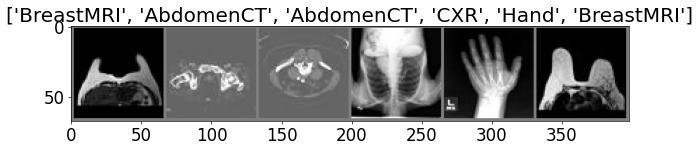

In [21]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})
def imshow(input, title):
    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0))
    # undo image normalization
    mean = np.array([0.5,0.5,0.5])
    std = np.array([0.5,0.5,0.5])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # display images
    plt.imshow(input)
    plt.title(title)
    plt.show()
# load a batch of train image
iterator = iter(train_loader)
# visualize a batch of train image
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:6])
imshow(out, title=[class_names[x] for x in classes[:6]])

In [22]:
model_mobilenet = models.mobilenet_v2(pretrained=True)  # Load MobileNet model
num_features = model_mobilenet.classifier[1].in_features  # Extract features from the classifier
model_mobilenet.classifier[1] = nn.Linear(num_features, 6)  # Set the number of output classes to 6
model_mobilenet = model_mobilenet.to(device)
criterion = nn.CrossEntropyLoss()  # Set the loss function
optimizer = optim.SGD(model_mobilenet.parameters(), lr=0.001, momentum=0.9)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 65.6MB/s]


In [23]:
# Initialize history
history_loss = {"train": [], "val": [], "test": []} 
history_accuracy = {"train": [], "val": [], "test": []}  
def train(net, loaders, optimizer, criterion, epochs=10, dev=device):
    try:
        net = net.to(dev)
    #    print(net)
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0,"test": 0}  
            sum_accuracy = {"train": 0, "val": 0,"test": 0}  
            # Process each split
            for split in ["train", "val", "test"]:  
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in loaders[split]:
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    outputs = net(input)
                    loss = criterion(outputs, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    preds = torch.argmax(outputs, 1)
                    batch_accuracy = (preds == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]} 
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}  
            # Update history
            for split in ["train", "val", "test"]:   
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrACC={epoch_accuracy['train']:.4f},",
                  f"TrLoss={epoch_loss['train']:.4f} ||",
                  f"ValACC={epoch_accuracy['val']:.4f},",
                  f"ValLoss={epoch_loss['val']:.4f} ||",
                  f"TestACC={epoch_accuracy['test']:.4f},",
                  f"TestLoss={epoch_loss['test']:.4f} ||")       
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:  
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:  
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()

# Define dictionary of loaders
loaders = {"train": train_loader,  
           "val": val_loader,   
           "test": test_loader}

Epoch 1: TrACC=0.9895, TrLoss=0.0386 || ValACC=0.9998, ValLoss=0.0009 || TestACC=1.0000, TestLoss=0.0008 ||
Epoch 2: TrACC=0.9997, TrLoss=0.0019 || ValACC=1.0000, ValLoss=0.0003 || TestACC=1.0000, TestLoss=0.0004 ||
Epoch 3: TrACC=0.9998, TrLoss=0.0012 || ValACC=1.0000, ValLoss=0.0003 || TestACC=1.0000, TestLoss=0.0002 ||
Epoch 4: TrACC=1.0000, TrLoss=0.0006 || ValACC=1.0000, ValLoss=0.0002 || TestACC=0.9998, TestLoss=0.0003 ||
Epoch 5: TrACC=0.9999, TrLoss=0.0006 || ValACC=1.0000, ValLoss=0.0001 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 6: TrACC=0.9999, TrLoss=0.0004 || ValACC=1.0000, ValLoss=0.0001 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 7: TrACC=0.9999, TrLoss=0.0006 || ValACC=1.0000, ValLoss=0.0002 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 8: TrACC=1.0000, TrLoss=0.0003 || ValACC=1.0000, ValLoss=0.0000 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 9: TrACC=1.0000, TrLoss=0.0003 || ValACC=1.0000, ValLoss=0.0001 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 10: TrACC=1.0000, TrLo

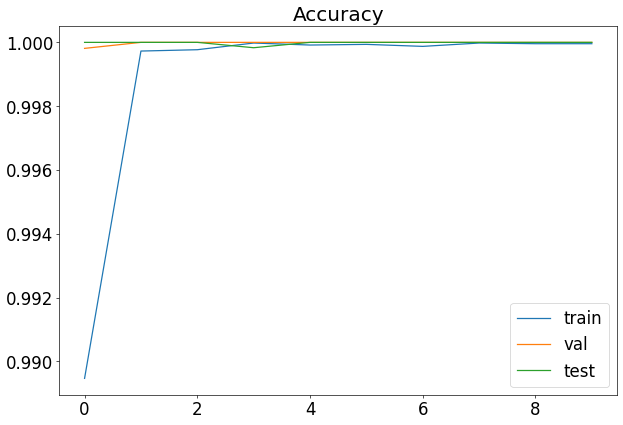

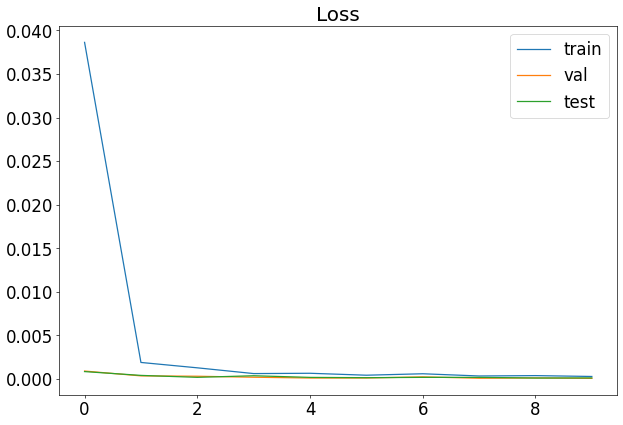

In [24]:
train(model_mobilenet, loaders, optimizer, criterion, epochs=10, dev=device)

In [25]:
# Set random seed for reproducibility
manualSeed = 999
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [26]:
image_size = 64
n_classes = 6
embedding_dim = 100
z_dim = 100  #latent dim
outf = "output"

In [27]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_conditioned_generator = nn.Sequential(nn.Embedding(n_classes, embedding_dim),
                      nn.Linear(embedding_dim, 16))

        self.latent = nn.Sequential(nn.Linear(z_dim, 4*4*512),
                                   nn.LeakyReLU(0.2, inplace=True))

        self.model = nn.Sequential(nn.ConvTranspose2d(513, 64*8, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(64*8, momentum=0.1,  eps=0.8),
                      nn.ReLU(True),
                      nn.ConvTranspose2d(64*8, 64*4, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(64*4, momentum=0.1,  eps=0.8),
                      nn.ReLU(True), 
                      nn.ConvTranspose2d(64*4, 64*2, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(64*2, momentum=0.1,  eps=0.8),
                      nn.ReLU(True), 
                      nn.ConvTranspose2d(64*2, 3, 4, 2, 1, bias=False), 

                      nn.Tanh())

    def forward(self, inputs):
        noise_vector, label = inputs
        label_output = self.label_conditioned_generator(label)
        label_output = label_output.view(-1, 1, 4, 4)
        latent_output = self.latent(noise_vector)
        latent_output = latent_output.view(-1, 512, 4, 4)
        concat = torch.cat((latent_output, label_output), dim=1)
        image = self.model(concat)
        return image

In [28]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.label_condition_disc = nn.Sequential(nn.Embedding(n_classes, embedding_dim),
                      nn.Linear(embedding_dim, 3*64*64))

        self.model = nn.Sequential(nn.Conv2d(6, 64, 4, 2, 1, bias=False),
                      nn.LeakyReLU(0.2, inplace=True),
                      nn.Conv2d(64, 64*2, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(64*2, momentum=0.1,  eps=0.8),
                      nn.LeakyReLU(0.2, inplace=True),
                      nn.Conv2d(64*2, 64*4, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(64*4, momentum=0.1,  eps=0.8),
                      nn.LeakyReLU(0.2, inplace=True), 
                      nn.Flatten(),
                      nn.Dropout(0.4),
                      nn.Linear(64*8*8*4, 1),
                      nn.Sigmoid())
        

    def forward(self, inputs):
        img, label = inputs
        label_output = self.label_condition_disc(label)
        label_output = label_output.view(-1, 3, 64, 64)
        concat = torch.cat((img, label_output), dim=1)
        output = self.model(concat)
        return output

In [29]:
# custom weights initialization called on generator and discriminator
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
        torch.nn.init.zeros_(m.bias)

In [30]:
dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [31]:
# Create discriminator and generator
generator = Generator().to(dev)
generator.apply(weights_init)
discriminator = Discriminator().to(dev)
discriminator.apply(weights_init)

Discriminator(
  (label_condition_disc): Sequential(
    (0): Embedding(6, 100)
    (1): Linear(in_features=100, out_features=12288, bias=True)
  )
  (model): Sequential(
    (0): Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Dropout(p=0.4, inplace=False)
    (10): Linear(in_features=16384, out_features=1, bias=True)
    (11): Sigmoid()
  )
)

In [32]:
# Loss function
criterion = nn.BCELoss()

# Define the optimizers for the generator and discriminator models
G_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
D_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [33]:
def generator_loss(label, fake_output):
    gen_loss = criterion(label, fake_output)
    #print(gen_loss)
    return gen_loss

def discriminator_loss(label, output):
    disc_loss = criterion(label, output)
    #print(total_loss)
    return disc_loss

In [34]:
D_loss_plot, G_loss_plot, all_fid = [], [], []

if os.path.exists("Training_images"):
  shutil.rmtree('Training_images')

transform_fid = T.Compose([
    T.Resize((image_size,image_size))])

image_dir = "Medico/"
training_fid = torchvision.datasets.ImageFolder(image_dir, transform=transform_fid) 

os.makedirs('Training_images')
for idx in tqdm(range(len(training_fid))):
  img, label = training_fid.__getitem__(idx)
  img.save(f"Training_images/{idx}.png")

100%|██████████| 58954/58954 [01:09<00:00, 847.75it/s]


In [35]:
if os.path.exists("created_image"):
  shutil.rmtree('created_image')

if os.path.exists(outf):
  shutil.rmtree(outf)

try:
    os.makedirs(outf)
except OSError:
  pass   

In [36]:
def normalize_images_IS(images): #IS wants input between [0,1]
    # Normalize a batch of images to be between 0 and 1
    max_value = torch.max(images)
    min_value = torch.min(images)
    normalized_images = (images - min_value) / (max_value - min_value)
    return normalized_images

In [37]:
num_epochs = 220
for epoch in range(1, num_epochs+1): 
 
    D_loss_list, G_loss_list = [], []
    
    for index, (real_images, labels) in enumerate(train_loader):
        D_optimizer.zero_grad()
        # Real Data
        real_images = real_images.to(dev)
        # Real labels
        labels = labels.to(dev)
        labels = labels.unsqueeze(1).long()
 
        #Real and fake labels (real = 1, fake = 0)
        real_target = torch.ones(real_images.size(0), 1).to(dev)
        fake_target = torch.zeros(real_images.size(0), 1).to(dev)
       
        D_real_loss = discriminator_loss(discriminator((real_images, labels)), real_target)
     
        # Create the noise (starting of the fake images)
        noise_vector = torch.randn(real_images.size(0), z_dim, device=dev)  
        noise_vector = noise_vector.to(dev)
         
        generated_image = generator((noise_vector, labels))
        output = discriminator((generated_image.detach(), labels))
        D_fake_loss = discriminator_loss(output,  fake_target)
 
        # train with fake       
        D_total_loss = (D_real_loss + D_fake_loss) / 2
        D_loss_list.append(D_total_loss)
       
        D_total_loss.backward()
        D_optimizer.step()
 
        # Train generator with real labels
        G_optimizer.zero_grad()
        G_loss = generator_loss(discriminator((generated_image, labels)), real_target)
        G_loss_list.append(G_loss)
 
        G_loss.backward()
        G_optimizer.step()

    if epoch % 20 == 0 or epoch == 1:
      vutils.save_image(real_images[0], '%s/real_samples.png' % outf, normalize=True) 
      #  fake = generator(noise_vector)
      vutils.save_image(generated_image.detach(), '%s/fake_samples_epoch_%03d.png' % (outf, epoch), normalize=True)
    
    D_loss_plot.append(torch.mean(torch.FloatTensor(D_loss_list)))
    G_loss_plot.append(torch.mean(torch.FloatTensor(G_loss_list)))
    
    #FID and IS calculated every 20 epochs
    if epoch % 20 == 0 or epoch == 1:
      try:
        os.makedirs("created_image")
      except OSError:
        pass  
      for _ in tqdm(range(20)):  
        with torch.no_grad():
          noise_vector = torch.randn(64, z_dim, device=dev)   
          fake_imgs = generator((noise_vector, labels))  
        for idx in range(fake_imgs.shape[0]):
          fake_img= fake_imgs[idx]
          vutils.save_image(fake_img,f"created_image/{str(uuid.uuid4())}.png",normalize=True)
      fid = calculate_fid_given_paths(['Training_images','created_image'],dims=2048, device = 'cuda',batch_size=64)
      fake_imgs = normalize_images_IS(fake_imgs.cpu())  #to be sure that values are normalized between [0,1]
      inception = InceptionScore(normalize = True)  #to make the inception score accept values between [0,1]
      inception.update(fake_imgs)
      all_fid.append(fid)
      print('Epoch: [%d/%d]: D_loss: %.3f | G_loss: %.3f | IS = mean:%.2f, std:%.2f | FID=%.2f' % (
           (epoch), num_epochs, torch.mean(torch.FloatTensor(D_loss_list)),\
           torch.mean(torch.FloatTensor(G_loss_list)), inception.compute()[0], inception.compute()[1], fid))
      # do checkpointing
      torch.save(generator.state_dict(), '%s/netG_epoch_%d.pth' % (outf, epoch))
      torch.save(discriminator.state_dict(), '%s/netD_epoch_%d.pth' % (outf, epoch))
      shutil.rmtree('created_image')
    else:
      print('Epoch: [%d/%d]: D_loss: %.3f | G_loss: %.3f' % (
           (epoch), num_epochs, torch.mean(torch.FloatTensor(D_loss_list)),\
           torch.mean(torch.FloatTensor(G_loss_list))))

100%|██████████| 20/20 [00:02<00:00,  7.04it/s]
Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 279MB/s]
100%|██████████| 20/20 [00:05<00:00,  3.97it/s]
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:01<00:00, 72.3MB/s]


Epoch: [1/220]: D_loss: 0.436 | G_loss: 1.784 | IS = mean:1.77, std:0.32 | FID=344.47
Epoch: [2/220]: D_loss: 0.506 | G_loss: 1.540
Epoch: [3/220]: D_loss: 0.502 | G_loss: 1.508
Epoch: [4/220]: D_loss: 0.489 | G_loss: 1.483
Epoch: [5/220]: D_loss: 0.447 | G_loss: 1.654
Epoch: [6/220]: D_loss: 0.429 | G_loss: 1.756
Epoch: [7/220]: D_loss: 0.428 | G_loss: 1.785
Epoch: [8/220]: D_loss: 0.431 | G_loss: 1.784
Epoch: [9/220]: D_loss: 0.438 | G_loss: 1.766
Epoch: [10/220]: D_loss: 0.445 | G_loss: 1.745
Epoch: [11/220]: D_loss: 0.447 | G_loss: 1.751
Epoch: [12/220]: D_loss: 0.454 | G_loss: 1.730
Epoch: [13/220]: D_loss: 0.454 | G_loss: 1.741
Epoch: [14/220]: D_loss: 0.460 | G_loss: 1.726
Epoch: [15/220]: D_loss: 0.455 | G_loss: 1.739
Epoch: [16/220]: D_loss: 0.459 | G_loss: 1.751
Epoch: [17/220]: D_loss: 0.456 | G_loss: 1.759
Epoch: [18/220]: D_loss: 0.459 | G_loss: 1.762
Epoch: [19/220]: D_loss: 0.459 | G_loss: 1.772


100%|██████████| 20/20 [00:04<00:00,  4.00it/s]


Epoch: [20/220]: D_loss: 0.458 | G_loss: 1.759 | IS = mean:2.66, std:0.65 | FID=151.09
Epoch: [21/220]: D_loss: 0.457 | G_loss: 1.788
Epoch: [22/220]: D_loss: 0.455 | G_loss: 1.786
Epoch: [23/220]: D_loss: 0.461 | G_loss: 1.790
Epoch: [24/220]: D_loss: 0.454 | G_loss: 1.796
Epoch: [25/220]: D_loss: 0.458 | G_loss: 1.787
Epoch: [26/220]: D_loss: 0.456 | G_loss: 1.799
Epoch: [27/220]: D_loss: 0.462 | G_loss: 1.786
Epoch: [28/220]: D_loss: 0.456 | G_loss: 1.796
Epoch: [29/220]: D_loss: 0.455 | G_loss: 1.807
Epoch: [30/220]: D_loss: 0.459 | G_loss: 1.819
Epoch: [31/220]: D_loss: 0.456 | G_loss: 1.805
Epoch: [32/220]: D_loss: 0.456 | G_loss: 1.826
Epoch: [33/220]: D_loss: 0.456 | G_loss: 1.810
Epoch: [34/220]: D_loss: 0.462 | G_loss: 1.794
Epoch: [35/220]: D_loss: 0.460 | G_loss: 1.799
Epoch: [36/220]: D_loss: 0.458 | G_loss: 1.812
Epoch: [37/220]: D_loss: 0.460 | G_loss: 1.807
Epoch: [38/220]: D_loss: 0.459 | G_loss: 1.819
Epoch: [39/220]: D_loss: 0.463 | G_loss: 1.804


100%|██████████| 20/20 [00:05<00:00,  3.90it/s]


Epoch: [40/220]: D_loss: 0.459 | G_loss: 1.815 | IS = mean:2.68, std:0.72 | FID=137.96
Epoch: [41/220]: D_loss: 0.460 | G_loss: 1.795
Epoch: [42/220]: D_loss: 0.492 | G_loss: 1.809
Epoch: [43/220]: D_loss: 0.457 | G_loss: 1.774
Epoch: [44/220]: D_loss: 0.456 | G_loss: 1.825
Epoch: [45/220]: D_loss: 0.463 | G_loss: 1.814
Epoch: [46/220]: D_loss: 0.460 | G_loss: 1.807
Epoch: [47/220]: D_loss: 0.462 | G_loss: 1.802
Epoch: [48/220]: D_loss: 0.463 | G_loss: 1.801
Epoch: [49/220]: D_loss: 0.462 | G_loss: 1.801
Epoch: [50/220]: D_loss: 0.466 | G_loss: 1.795
Epoch: [51/220]: D_loss: 0.467 | G_loss: 1.793
Epoch: [52/220]: D_loss: 0.466 | G_loss: 1.789
Epoch: [53/220]: D_loss: 0.488 | G_loss: 1.776
Epoch: [54/220]: D_loss: 0.460 | G_loss: 1.785
Epoch: [55/220]: D_loss: 0.467 | G_loss: 1.788
Epoch: [56/220]: D_loss: 0.466 | G_loss: 1.784
Epoch: [57/220]: D_loss: 0.468 | G_loss: 1.783
Epoch: [58/220]: D_loss: 0.468 | G_loss: 1.799
Epoch: [59/220]: D_loss: 0.470 | G_loss: 1.782


100%|██████████| 20/20 [00:04<00:00,  4.00it/s]


Epoch: [60/220]: D_loss: 0.469 | G_loss: 1.780 | IS = mean:2.47, std:0.64 | FID=121.98
Epoch: [61/220]: D_loss: 0.470 | G_loss: 1.784
Epoch: [62/220]: D_loss: 0.468 | G_loss: 1.782
Epoch: [63/220]: D_loss: 0.520 | G_loss: 1.748
Epoch: [64/220]: D_loss: 0.465 | G_loss: 1.773
Epoch: [65/220]: D_loss: 0.466 | G_loss: 1.784
Epoch: [66/220]: D_loss: 0.471 | G_loss: 1.785
Epoch: [67/220]: D_loss: 0.470 | G_loss: 1.778
Epoch: [68/220]: D_loss: 0.465 | G_loss: 1.800
Epoch: [69/220]: D_loss: 0.471 | G_loss: 1.796
Epoch: [70/220]: D_loss: 0.466 | G_loss: 1.798
Epoch: [71/220]: D_loss: 0.468 | G_loss: 1.804
Epoch: [72/220]: D_loss: 0.471 | G_loss: 1.788
Epoch: [73/220]: D_loss: 0.470 | G_loss: 1.796
Epoch: [74/220]: D_loss: 0.471 | G_loss: 1.776
Epoch: [75/220]: D_loss: 0.468 | G_loss: 1.795
Epoch: [76/220]: D_loss: 0.462 | G_loss: 1.803
Epoch: [77/220]: D_loss: 0.467 | G_loss: 1.806
Epoch: [78/220]: D_loss: 0.465 | G_loss: 1.797
Epoch: [79/220]: D_loss: 0.467 | G_loss: 1.799


100%|██████████| 20/20 [00:05<00:00,  3.98it/s]


Epoch: [80/220]: D_loss: 0.464 | G_loss: 1.809 | IS = mean:2.50, std:0.63 | FID=124.78
Epoch: [81/220]: D_loss: 0.469 | G_loss: 1.807
Epoch: [82/220]: D_loss: 0.464 | G_loss: 1.808
Epoch: [83/220]: D_loss: 0.468 | G_loss: 1.813
Epoch: [84/220]: D_loss: 0.463 | G_loss: 1.812
Epoch: [85/220]: D_loss: 0.466 | G_loss: 1.817
Epoch: [86/220]: D_loss: 0.464 | G_loss: 1.832
Epoch: [87/220]: D_loss: 0.466 | G_loss: 1.811
Epoch: [88/220]: D_loss: 0.465 | G_loss: 1.807
Epoch: [89/220]: D_loss: 0.466 | G_loss: 1.827
Epoch: [90/220]: D_loss: 0.462 | G_loss: 1.842
Epoch: [91/220]: D_loss: 0.462 | G_loss: 1.834
Epoch: [92/220]: D_loss: 0.464 | G_loss: 1.825
Epoch: [93/220]: D_loss: 0.460 | G_loss: 1.840
Epoch: [94/220]: D_loss: 0.457 | G_loss: 1.850
Epoch: [95/220]: D_loss: 0.474 | G_loss: 1.833
Epoch: [96/220]: D_loss: 0.456 | G_loss: 1.846
Epoch: [97/220]: D_loss: 0.454 | G_loss: 1.844
Epoch: [98/220]: D_loss: 0.461 | G_loss: 1.847
Epoch: [99/220]: D_loss: 0.459 | G_loss: 1.858


100%|██████████| 20/20 [00:04<00:00,  4.01it/s]


Epoch: [100/220]: D_loss: 0.486 | G_loss: 1.825 | IS = mean:2.63, std:0.70 | FID=114.04
Epoch: [101/220]: D_loss: 0.452 | G_loss: 1.856
Epoch: [102/220]: D_loss: 0.459 | G_loss: 1.863
Epoch: [103/220]: D_loss: 0.454 | G_loss: 1.871
Epoch: [104/220]: D_loss: 0.455 | G_loss: 1.869
Epoch: [105/220]: D_loss: 0.455 | G_loss: 1.865
Epoch: [106/220]: D_loss: 0.467 | G_loss: 1.855
Epoch: [107/220]: D_loss: 0.456 | G_loss: 1.869
Epoch: [108/220]: D_loss: 0.457 | G_loss: 1.863
Epoch: [109/220]: D_loss: 0.454 | G_loss: 1.883
Epoch: [110/220]: D_loss: 0.454 | G_loss: 1.884
Epoch: [111/220]: D_loss: 0.467 | G_loss: 1.877
Epoch: [112/220]: D_loss: 0.444 | G_loss: 1.897
Epoch: [113/220]: D_loss: 0.448 | G_loss: 1.900
Epoch: [114/220]: D_loss: 0.447 | G_loss: 1.913
Epoch: [115/220]: D_loss: 0.451 | G_loss: 1.912
Epoch: [116/220]: D_loss: 0.448 | G_loss: 1.909
Epoch: [117/220]: D_loss: 0.449 | G_loss: 1.908
Epoch: [118/220]: D_loss: 0.449 | G_loss: 1.899
Epoch: [119/220]: D_loss: 0.559 | G_loss: 1.892


100%|██████████| 20/20 [00:05<00:00,  3.97it/s]


Epoch: [120/220]: D_loss: 0.447 | G_loss: 1.870 | IS = mean:2.56, std:0.73 | FID=112.51
Epoch: [121/220]: D_loss: 0.447 | G_loss: 1.899
Epoch: [122/220]: D_loss: 0.447 | G_loss: 1.918
Epoch: [123/220]: D_loss: 0.456 | G_loss: 1.901
Epoch: [124/220]: D_loss: 0.444 | G_loss: 1.928
Epoch: [125/220]: D_loss: 0.442 | G_loss: 1.934
Epoch: [126/220]: D_loss: 0.448 | G_loss: 1.929
Epoch: [127/220]: D_loss: 0.446 | G_loss: 1.927
Epoch: [128/220]: D_loss: 0.446 | G_loss: 1.921
Epoch: [129/220]: D_loss: 0.442 | G_loss: 1.947
Epoch: [130/220]: D_loss: 0.448 | G_loss: 1.934
Epoch: [131/220]: D_loss: 0.445 | G_loss: 1.940
Epoch: [132/220]: D_loss: 0.443 | G_loss: 1.940
Epoch: [133/220]: D_loss: 0.441 | G_loss: 1.951
Epoch: [134/220]: D_loss: 0.446 | G_loss: 1.953
Epoch: [135/220]: D_loss: 0.440 | G_loss: 1.951
Epoch: [136/220]: D_loss: 0.473 | G_loss: 1.940
Epoch: [137/220]: D_loss: 0.433 | G_loss: 1.951
Epoch: [138/220]: D_loss: 0.462 | G_loss: 1.948
Epoch: [139/220]: D_loss: 0.429 | G_loss: 1.952


100%|██████████| 20/20 [00:05<00:00,  3.84it/s]


Epoch: [140/220]: D_loss: 0.429 | G_loss: 2.007 | IS = mean:2.45, std:0.64 | FID=107.19
Epoch: [141/220]: D_loss: 0.424 | G_loss: 2.037
Epoch: [142/220]: D_loss: 0.424 | G_loss: 2.044
Epoch: [143/220]: D_loss: 0.420 | G_loss: 2.059
Epoch: [144/220]: D_loss: 0.420 | G_loss: 2.060
Epoch: [145/220]: D_loss: 0.424 | G_loss: 2.072
Epoch: [146/220]: D_loss: 0.426 | G_loss: 2.071
Epoch: [147/220]: D_loss: 0.416 | G_loss: 2.076
Epoch: [148/220]: D_loss: 0.415 | G_loss: 2.094
Epoch: [149/220]: D_loss: 0.416 | G_loss: 2.084
Epoch: [150/220]: D_loss: 0.422 | G_loss: 2.088
Epoch: [151/220]: D_loss: 0.639 | G_loss: 2.087
Epoch: [152/220]: D_loss: 0.411 | G_loss: 2.072
Epoch: [153/220]: D_loss: 0.415 | G_loss: 2.097
Epoch: [154/220]: D_loss: 0.410 | G_loss: 2.117
Epoch: [155/220]: D_loss: 0.411 | G_loss: 2.130
Epoch: [156/220]: D_loss: 0.414 | G_loss: 2.130
Epoch: [157/220]: D_loss: 0.411 | G_loss: 2.125
Epoch: [158/220]: D_loss: 0.403 | G_loss: 2.155
Epoch: [159/220]: D_loss: 0.402 | G_loss: 2.164


100%|██████████| 20/20 [00:05<00:00,  3.99it/s]


Epoch: [160/220]: D_loss: 0.437 | G_loss: 2.163 | IS = mean:2.57, std:0.69 | FID=101.34
Epoch: [161/220]: D_loss: 0.401 | G_loss: 2.176
Epoch: [162/220]: D_loss: 0.399 | G_loss: 2.180
Epoch: [163/220]: D_loss: 0.400 | G_loss: 2.208
Epoch: [164/220]: D_loss: 0.393 | G_loss: 2.215
Epoch: [165/220]: D_loss: 0.433 | G_loss: 2.207
Epoch: [166/220]: D_loss: 0.386 | G_loss: 2.198
Epoch: [167/220]: D_loss: 0.391 | G_loss: 2.224
Epoch: [168/220]: D_loss: 0.386 | G_loss: 2.263
Epoch: [169/220]: D_loss: 0.392 | G_loss: 2.257
Epoch: [170/220]: D_loss: 0.383 | G_loss: 2.278
Epoch: [171/220]: D_loss: 0.381 | G_loss: 2.302
Epoch: [172/220]: D_loss: 0.382 | G_loss: 2.324
Epoch: [173/220]: D_loss: 0.384 | G_loss: 2.323
Epoch: [174/220]: D_loss: 0.377 | G_loss: 2.335
Epoch: [175/220]: D_loss: 0.503 | G_loss: 2.311
Epoch: [176/220]: D_loss: 0.366 | G_loss: 2.319
Epoch: [177/220]: D_loss: 0.363 | G_loss: 2.394
Epoch: [178/220]: D_loss: 0.370 | G_loss: 2.400
Epoch: [179/220]: D_loss: 0.363 | G_loss: 2.418


100%|██████████| 20/20 [00:05<00:00,  3.88it/s]


Epoch: [180/220]: D_loss: 0.364 | G_loss: 2.450 | IS = mean:2.71, std:0.72 | FID=96.25
Epoch: [181/220]: D_loss: 0.359 | G_loss: 2.473
Epoch: [182/220]: D_loss: 0.410 | G_loss: 2.445
Epoch: [183/220]: D_loss: 0.349 | G_loss: 2.461
Epoch: [184/220]: D_loss: 0.350 | G_loss: 2.510
Epoch: [185/220]: D_loss: 0.354 | G_loss: 2.520
Epoch: [186/220]: D_loss: 0.351 | G_loss: 2.546
Epoch: [187/220]: D_loss: 0.349 | G_loss: 2.534
Epoch: [188/220]: D_loss: 0.372 | G_loss: 2.532
Epoch: [189/220]: D_loss: 0.339 | G_loss: 2.557
Epoch: [190/220]: D_loss: 0.342 | G_loss: 2.618
Epoch: [191/220]: D_loss: 0.335 | G_loss: 2.618
Epoch: [192/220]: D_loss: 0.338 | G_loss: 2.642
Epoch: [193/220]: D_loss: 0.367 | G_loss: 2.648
Epoch: [194/220]: D_loss: 0.330 | G_loss: 2.652
Epoch: [195/220]: D_loss: 0.329 | G_loss: 2.701
Epoch: [196/220]: D_loss: 0.336 | G_loss: 2.694
Epoch: [197/220]: D_loss: 0.328 | G_loss: 2.726
Epoch: [198/220]: D_loss: 0.344 | G_loss: 2.757
Epoch: [199/220]: D_loss: 0.324 | G_loss: 2.735


100%|██████████| 20/20 [00:04<00:00,  4.00it/s]


Epoch: [200/220]: D_loss: 0.452 | G_loss: 2.715 | IS = mean:2.43, std:0.68 | FID=95.34
Epoch: [201/220]: D_loss: 0.311 | G_loss: 2.754
Epoch: [202/220]: D_loss: 0.315 | G_loss: 2.803
Epoch: [203/220]: D_loss: 0.316 | G_loss: 2.817
Epoch: [204/220]: D_loss: 0.314 | G_loss: 2.830
Epoch: [205/220]: D_loss: 0.317 | G_loss: 2.830
Epoch: [206/220]: D_loss: 0.307 | G_loss: 2.851
Epoch: [207/220]: D_loss: 0.309 | G_loss: 2.892
Epoch: [208/220]: D_loss: 0.363 | G_loss: 2.896
Epoch: [209/220]: D_loss: 0.294 | G_loss: 2.894
Epoch: [210/220]: D_loss: 0.593 | G_loss: 2.997
Epoch: [211/220]: D_loss: 0.301 | G_loss: 2.867
Epoch: [212/220]: D_loss: 0.301 | G_loss: 2.904
Epoch: [213/220]: D_loss: 0.391 | G_loss: 2.933
Epoch: [214/220]: D_loss: 0.291 | G_loss: 2.951
Epoch: [215/220]: D_loss: 0.298 | G_loss: 3.009
Epoch: [216/220]: D_loss: 0.300 | G_loss: 3.012
Epoch: [217/220]: D_loss: 0.287 | G_loss: 3.050
Epoch: [218/220]: D_loss: 0.291 | G_loss: 3.067
Epoch: [219/220]: D_loss: 0.399 | G_loss: 3.026


100%|██████████| 20/20 [00:05<00:00,  3.97it/s]


Epoch: [220/220]: D_loss: 0.283 | G_loss: 3.102 | IS = mean:2.59, std:0.69 | FID=88.30


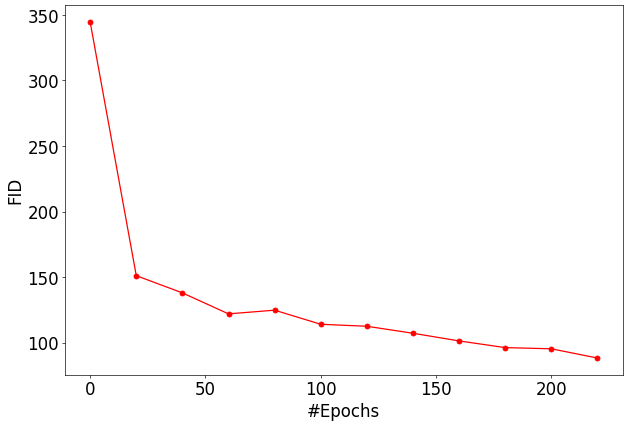

In [38]:
x = [i * 20 for i in range(0,len(all_fid))]
plt.ylabel("FID")
plt.xlabel("#Epochs")
plt.plot(x,all_fid, 'o-r') 
plt.show()

In [39]:
torch.save(generator, 'generatorENTIRE.pth')
torch.save(discriminator, 'discriminatorENTIRE.pth')

In [40]:
generator = torch.load('generatorENTIRE.pth')
discriminator = torch.load('discriminatorENTIRE.pth')
generator.eval()
print(summary(generator))
print(summary(discriminator))

Layer (type:depth-idx)                   Param #
Generator                                --
├─Sequential: 1-1                        --
│    └─Embedding: 2-1                    600
│    └─Linear: 2-2                       1,616
├─Sequential: 1-2                        --
│    └─Linear: 2-3                       827,392
│    └─LeakyReLU: 2-4                    --
├─Sequential: 1-3                        --
│    └─ConvTranspose2d: 2-5              4,202,496
│    └─BatchNorm2d: 2-6                  1,024
│    └─ReLU: 2-7                         --
│    └─ConvTranspose2d: 2-8              2,097,152
│    └─BatchNorm2d: 2-9                  512
│    └─ReLU: 2-10                        --
│    └─ConvTranspose2d: 2-11             524,288
│    └─BatchNorm2d: 2-12                 256
│    └─ReLU: 2-13                        --
│    └─ConvTranspose2d: 2-14             6,144
│    └─Tanh: 2-15                        --
Total params: 7,661,480
Trainable params: 7,661,480
Non-trainable params: 0
Lay

In [41]:
if os.path.exists("Fake_images_for_classification"):
  shutil.rmtree('Fake_images_for_classification')

os.makedirs('Fake_images_for_classification/train/AbdomenCT')
os.makedirs('Fake_images_for_classification/train/BreastMRI')
os.makedirs('Fake_images_for_classification/train/CXR')
os.makedirs('Fake_images_for_classification/train/ChestCT')
os.makedirs('Fake_images_for_classification/train/Hand')
os.makedirs('Fake_images_for_classification/train/HeadCT')

In [42]:
label0 = torch.tensor([0]).to(dev)
label0 = label0.unsqueeze(1).long()
label1 = torch.tensor([1]).to(dev)
label1 = label1.unsqueeze(1).long()
label2 = torch.tensor([2]).to(dev)
label2 = label2.unsqueeze(1).long()
label3 = torch.tensor([3]).to(dev)
label3 = label3.unsqueeze(1).long()
label4 = torch.tensor([4]).to(dev)
label4 = label4.unsqueeze(1).long()
label5 = torch.tensor([5]).to(dev)
label5 = label5.unsqueeze(1).long()
generator.eval()
for i in range(7000):
  noise_vector = torch.randn(1, z_dim, device=dev)  
  generated_single_image = generator((noise_vector, label0))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/AbdomenCT/AbdomenCT_{i}.png", nrow=6, normalize=True)
  generated_single_image = generator((noise_vector, label1))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/BreastMRI/BreastMRI_{i}.png", nrow=6, normalize=True)
  generated_single_image = generator((noise_vector, label2))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/CXR/CXR_{i}.png", nrow=6, normalize=True)
  generated_single_image = generator((noise_vector, label3))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/ChestCT/ChestCT_{i}.png", nrow=6, normalize=True)
  generated_single_image = generator((noise_vector, label4))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/Hand/Hand_{i}.png", nrow=6, normalize=True)
  generated_single_image = generator((noise_vector, label5))
  save_image(generated_single_image.data[0].detach(), f"Fake_images_for_classification/train/HeadCT/HeadCT_{i}.png", nrow=6, normalize=True)



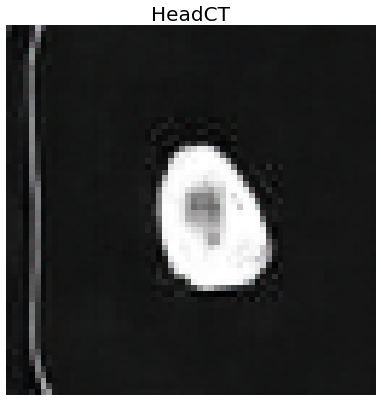

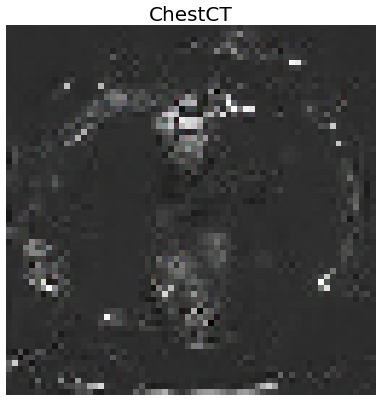

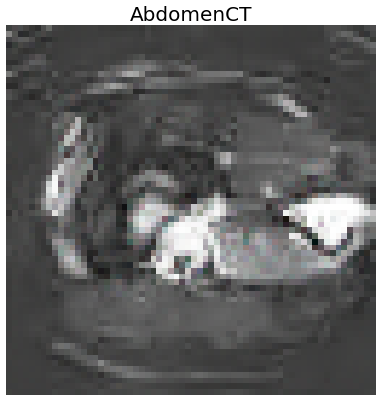

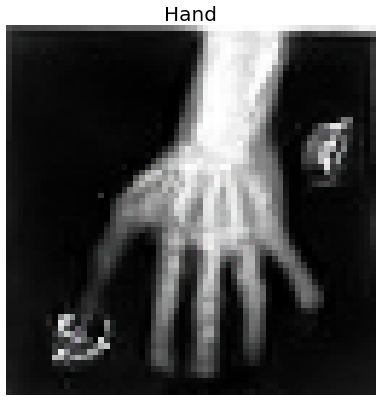

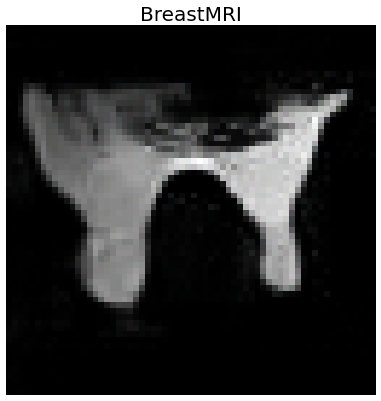

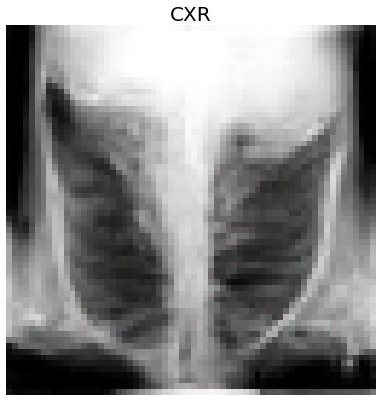

In [43]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

directory = 'Fake_images_for_classification/train/'
subdirectories = [subdir for subdir in os.listdir(directory) if os.path.isdir(os.path.join(directory, subdir))]

for subdir in subdirectories:
    subdir_path = os.path.join(directory, subdir)
    images_files = [file for file in os.listdir(subdir_path) if file.endswith('.png')]
    
    if images_files:
        random_images = random.choice(images_files)
        images_path = os.path.join(subdir_path, random_images)
    
        imgs = mpimg.imread(images_path)
        plt.imshow(imgs)
        plt.title(subdir)  # Display the subdirectory name as the plot title
        plt.axis('off')
        plt.show()




In [44]:
image_dir = "Fake_images_for_classification"
dataset_GAN = torchvision.datasets.ImageFolder(image_dir, transform=transform)
concat_training_set = ConcatDataset([train_set, dataset_GAN])
print(f'Training set (of original training images + gan images): {len(concat_training_set)}')
concat_dataloader = DataLoader(concat_training_set, batch_size=64, shuffle=True, drop_last = True, num_workers = 2)

Training set (of original training images + gan images): 89754


In [45]:
gan_model_mobilenet = models.mobilenet_v2(pretrained=True)  # Load MobileNet model
num_features = gan_model_mobilenet.classifier[1].in_features  # Extract features from the classifier
gan_model_mobilenet.classifier[1] = nn.Linear(num_features, 6)  # Set the number of output classes to 6
gan_model_mobilenet = gan_model_mobilenet.to(device)
criterion = nn.CrossEntropyLoss()  # Set the loss function
optimizer = optim.SGD(gan_model_mobilenet.parameters(), lr=0.001, momentum=0.9)

In [46]:
# Initialize history
gan_history_loss = {"train": [], "val": [], "test": []} 
gan_history_accuracy = {"train": [], "val": [], "test": []}  
def gan_train(net, loaders, optimizer, criterion, epochs=10, dev=dev):
    try:
        net = net.to(dev)
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0,"test": 0}  
            sum_accuracy = {"train": 0, "val": 0,"test": 0}  
            # Process each split
            for split in ["train", "val", "test"]:  
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in loaders[split]:
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    outputs = net(input)
                    loss = criterion(outputs, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    preds = torch.argmax(outputs, 1)
                    batch_accuracy = (preds == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}  
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}  
            # Update history
            for split in ["train", "val", "test"]:   
                gan_history_loss[split].append(epoch_loss[split])
                gan_history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrACC={epoch_accuracy['train']:.4f},",
                  f"TrLoss={epoch_loss['train']:.4f} ||",
                  f"ValACC={epoch_accuracy['val']:.4f},",
                  f"ValLoss={epoch_loss['val']:.4f} ||",
                  f"TestACC={epoch_accuracy['test']:.4f},",
                  f"TestLoss={epoch_loss['test']:.4f} ||")      
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:  
            plt.plot(gan_history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:  
            plt.plot(gan_history_loss[split], label=split)
        plt.legend()
        plt.show()

# Define dictionary of loaders
loaders = {"train": concat_dataloader,   
           "val": val_loader,   
           "test": test_loader}         

Epoch 1: TrACC=0.9738, TrLoss=0.0714 || ValACC=1.0000, ValLoss=0.0006 || TestACC=0.9997, TestLoss=0.0013 ||
Epoch 2: TrACC=0.9991, TrLoss=0.0036 || ValACC=0.9998, ValLoss=0.0012 || TestACC=1.0000, TestLoss=0.0007 ||
Epoch 3: TrACC=0.9998, TrLoss=0.0012 || ValACC=1.0000, ValLoss=0.0002 || TestACC=0.9998, TestLoss=0.0004 ||
Epoch 4: TrACC=0.9998, TrLoss=0.0009 || ValACC=1.0000, ValLoss=0.0000 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 5: TrACC=0.9999, TrLoss=0.0006 || ValACC=1.0000, ValLoss=0.0000 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 6: TrACC=0.9998, TrLoss=0.0009 || ValACC=0.9987, ValLoss=0.0045 || TestACC=0.9992, TestLoss=0.0016 ||
Epoch 7: TrACC=0.9990, TrLoss=0.0030 || ValACC=1.0000, ValLoss=0.0001 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 8: TrACC=0.9999, TrLoss=0.0004 || ValACC=1.0000, ValLoss=0.0000 || TestACC=0.9998, TestLoss=0.0013 ||
Epoch 9: TrACC=0.9999, TrLoss=0.0005 || ValACC=1.0000, ValLoss=0.0001 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 10: TrACC=1.0000, TrLo

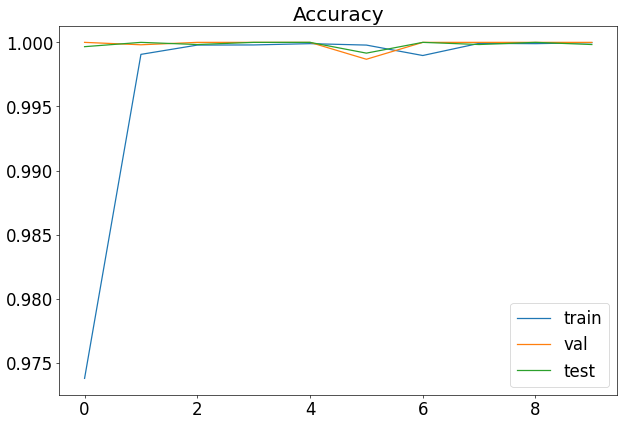

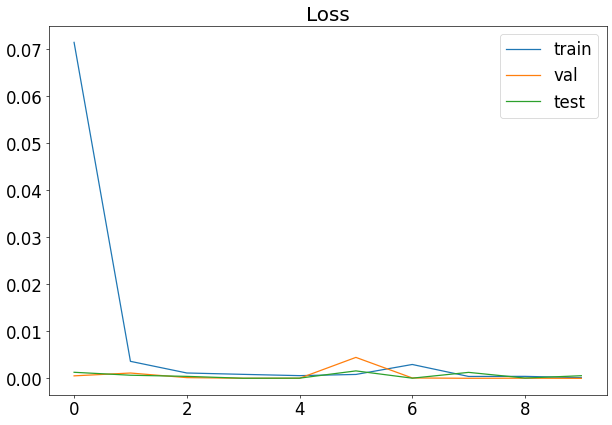

In [47]:
gan_train(gan_model_mobilenet, loaders, optimizer, criterion, epochs=10, dev=dev)

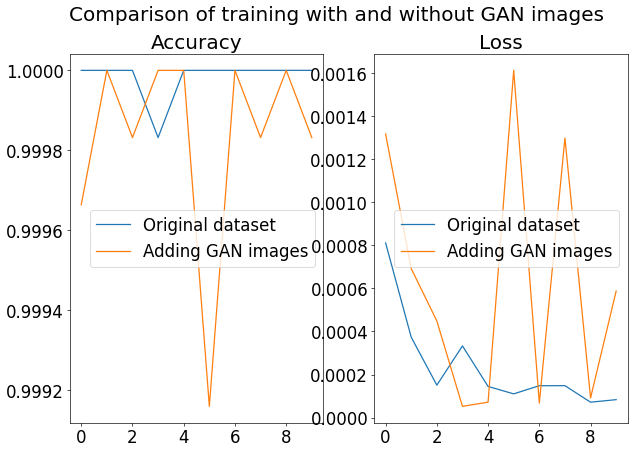

In [48]:
#plot 1:
plt.subplot(1, 2, 1)
plt.title("Accuracy")
plt.plot(history_accuracy['test'], label='Original dataset')
plt.plot(gan_history_accuracy['test'], label='Adding GAN images')
plt.legend()

#plot 2:
plt.subplot(1, 2, 2)
plt.title("Loss")
plt.plot(history_loss['test'], label='Original dataset')
plt.plot(gan_history_loss['test'], label='Adding GAN images')
plt.legend()

plt.suptitle("Comparison of training with and without GAN images ")
plt.show()

Epoch 1: TrACC=0.6173, TrLoss=4.3649 || ValACC=0.9998, ValLoss=0.0003 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 2: TrACC=0.6162, TrLoss=4.3696 || ValACC=1.0000, ValLoss=0.0000 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 3: TrACC=0.6175, TrLoss=4.3571 || ValACC=1.0000, ValLoss=0.0001 || TestACC=1.0000, TestLoss=0.0001 ||
Epoch 4: TrACC=0.6166, TrLoss=4.3638 || ValACC=1.0000, ValLoss=0.0000 || TestACC=1.0000, TestLoss=0.0000 ||


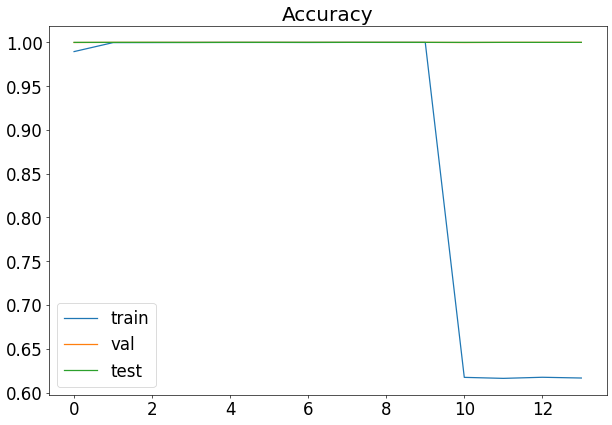

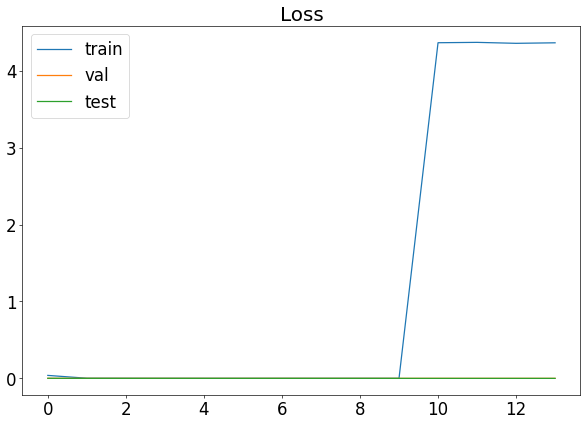

In [51]:
train(model_mobilenet, loaders, optimizer, criterion, epochs=4, dev=device)

Epoch 1: TrACC=0.9999, TrLoss=0.0003 || ValACC=1.0000, ValLoss=0.0000 || TestACC=0.9998, TestLoss=0.0004 ||
Epoch 2: TrACC=1.0000, TrLoss=0.0002 || ValACC=1.0000, ValLoss=0.0000 || TestACC=0.9998, TestLoss=0.0001 ||
Epoch 3: TrACC=1.0000, TrLoss=0.0001 || ValACC=1.0000, ValLoss=0.0001 || TestACC=1.0000, TestLoss=0.0000 ||
Epoch 4: TrACC=0.9999, TrLoss=0.0004 || ValACC=1.0000, ValLoss=0.0000 || TestACC=1.0000, TestLoss=0.0001 ||


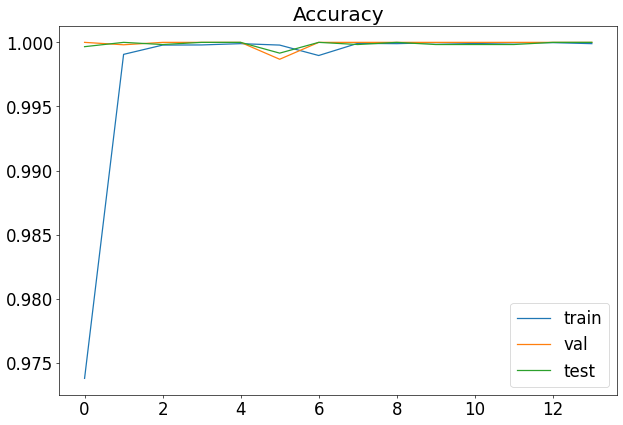

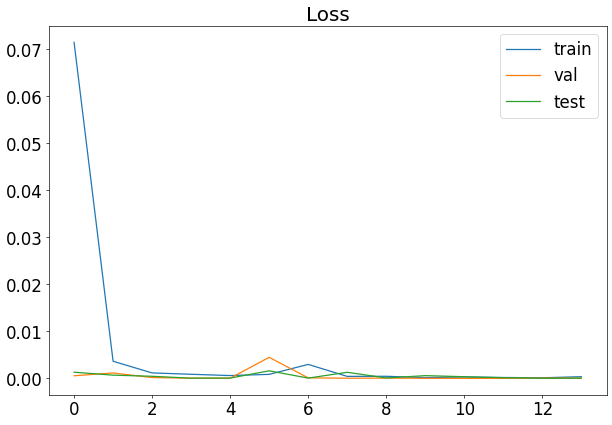

In [49]:
gan_train(gan_model_mobilenet, loaders, optimizer, criterion, epochs=4, dev=dev)

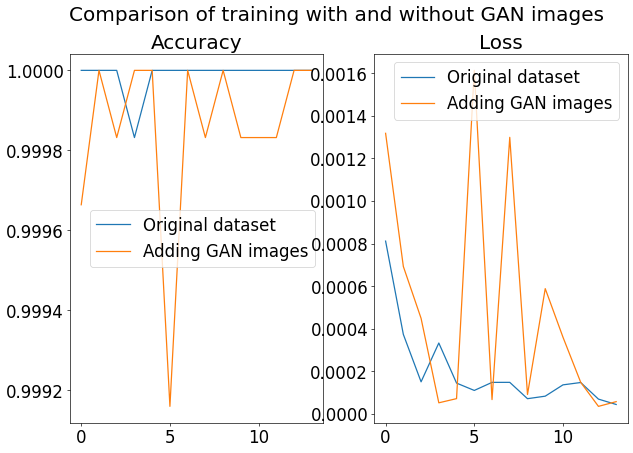

In [52]:
#plot 1:
plt.subplot(1, 2, 1)
plt.title("Accuracy")
plt.plot(history_accuracy['test'], label='Original dataset')
plt.plot(gan_history_accuracy['test'], label='Adding GAN images')
plt.legend()

#plot 2:
plt.subplot(1, 2, 2)
plt.title("Loss")
plt.plot(history_loss['test'], label='Original dataset')
plt.plot(gan_history_loss['test'], label='Adding GAN images')
plt.legend()

plt.suptitle("Comparison of training with and without GAN images ")
plt.show()